In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [9]:
import arviz as az

from numpyro.infer import MCMC, NUTS
import numpyro.distributions as dist
import numpyro
import jax
import jax.numpy as jnp

import numpy as np

import matplotlib.pyplot as plt

In [21]:
def ratio_model(ratio, ratio_err):
    x_unit = numpyro.sample("x_unit", dist.Normal(0, 1))
    y_unit = numpyro.sample("y_unit", dist.Normal(0, 1))

    numpyro.sample("ratio", dist.Normal(y_unit/x_unit, ratio_err), obs=ratio)

In [22]:
def angle_model(theta_obs, sigma_theta):
    x_unit = numpyro.sample("x_unit", dist.Normal(0, 1))
    y_unit = numpyro.sample("y_unit", dist.Normal(0, 1))
    theta = numpyro.deterministic("theta", jnp.arctan2(y_unit, x_unit))

    numpyro.sample("theta_obs", dist.Normal(theta, sigma_theta), obs=theta_obs)

In [23]:
ratio_obs = 1
ratio_err = 0.2

theta_obs = np.pi/4
sigma_theta = np.pi/4/10

In [25]:
kernel = NUTS(angle_model, dense_mass=True)
mcmc = MCMC(kernel, num_warmup=1000, num_samples=1000)
mcmc.run(jax.random.PRNGKey(np.random.randint(low=0, high=1<<32)), theta_obs, sigma_theta)
trace_angle = az.from_numpyro(mcmc)

sample: 100%|██████████| 2000/2000 [00:00<00:00, 2388.30it/s, 7 steps of size 4.29e-01. acc. prob=0.80]


In [30]:
kernel = NUTS(ratio_model, dense_mass=True)
mcmc = MCMC(kernel, num_warmup=1000, num_samples=1000)
mcmc.run(jax.random.PRNGKey(np.random.randint(low=0, high=1<<32)), ratio_obs, ratio_err)
trace_ratio = az.from_numpyro(mcmc)

sample: 100%|██████████| 2000/2000 [00:00<00:00, 2467.34it/s, 15 steps of size 2.14e-01. acc. prob=0.82]


array([[<Axes: ylabel='x_unit'>, <Axes: >],
       [<Axes: xlabel='theta', ylabel='y_unit'>, <Axes: xlabel='x_unit'>]],
      dtype=object)

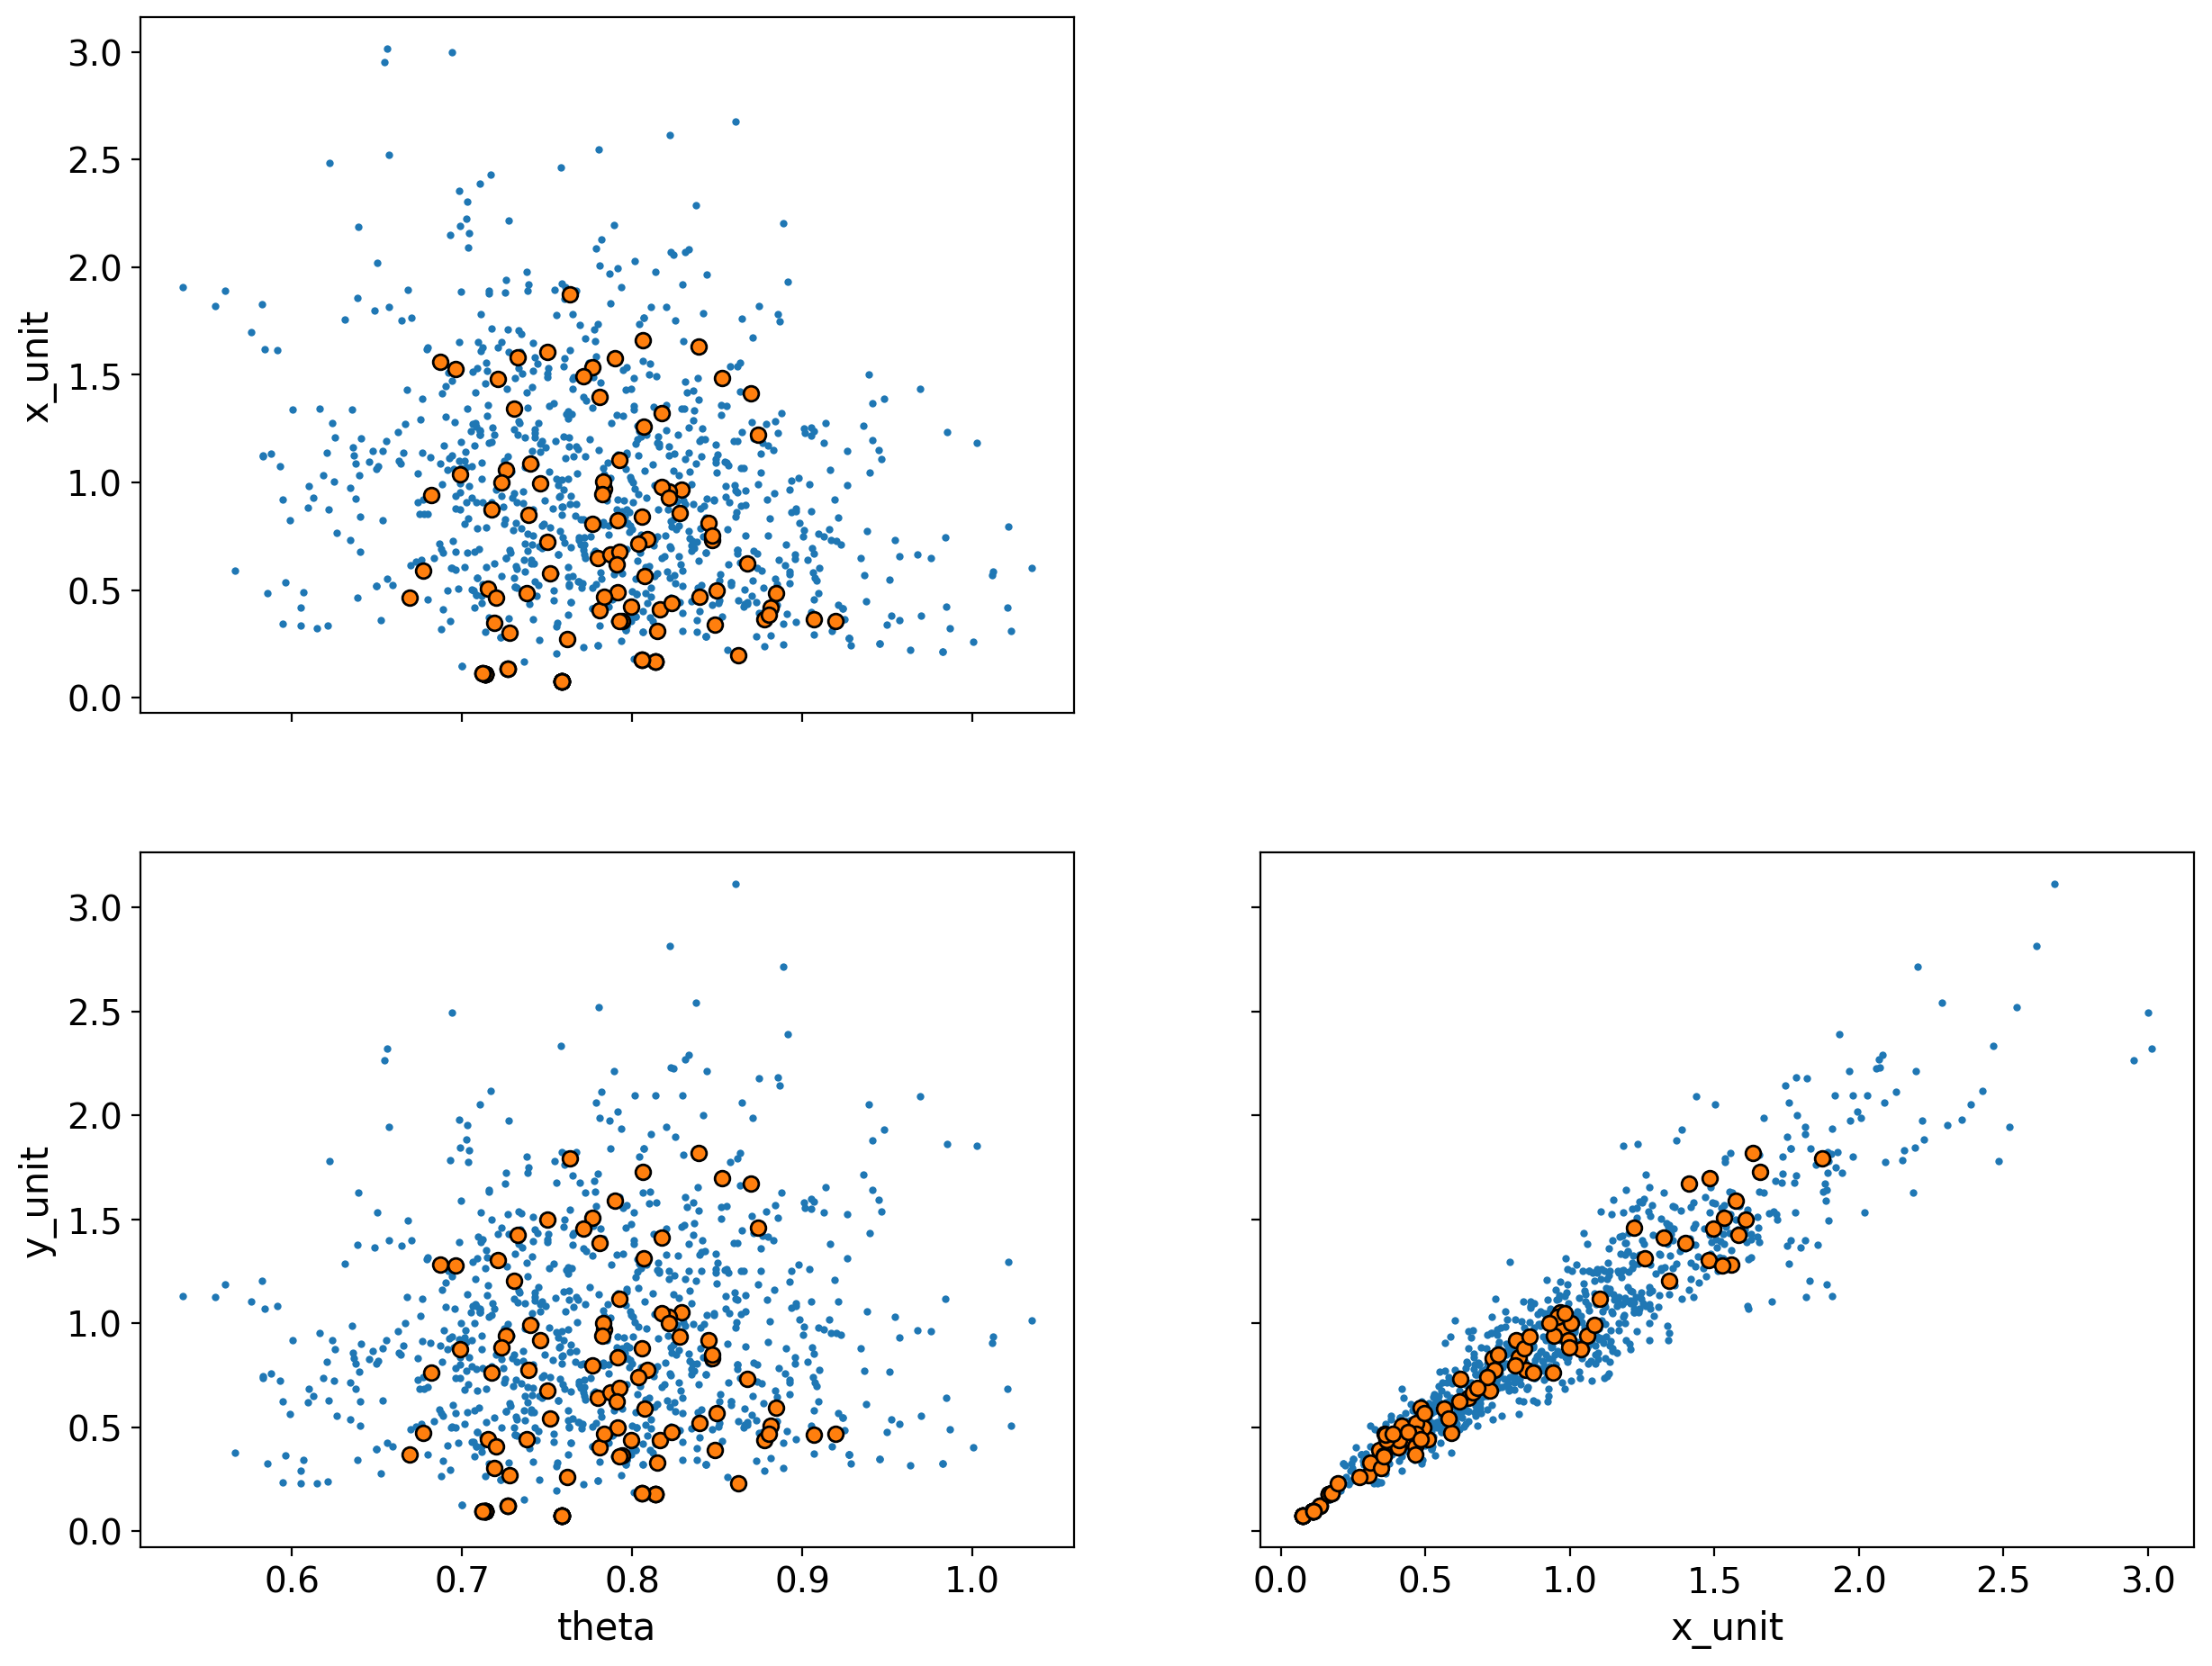

In [31]:
az.plot_pair(trace_angle, divergences=True)

<Axes: xlabel='x_unit', ylabel='y_unit'>

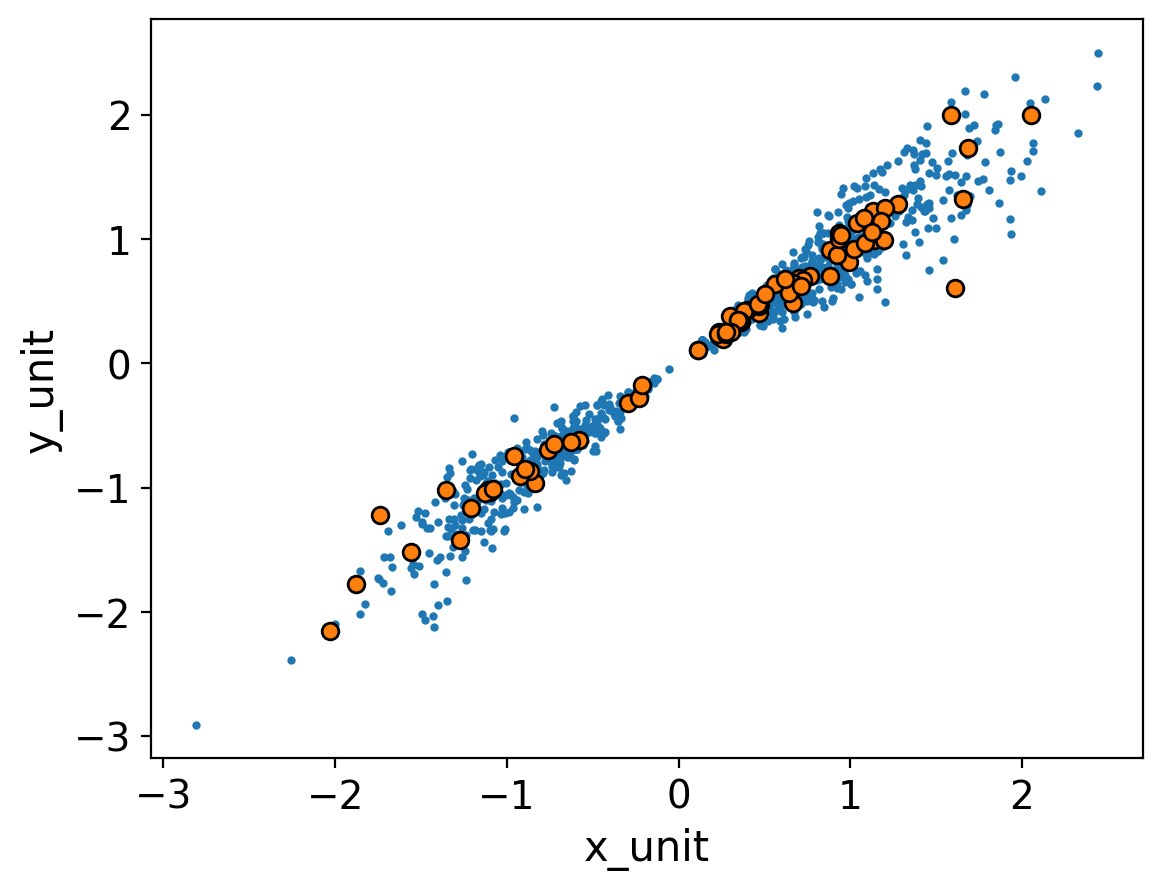

In [32]:
az.plot_pair(trace_ratio, divergences=True)